In [242]:
import pandas as pd
import numpy as np

## Format ratio

In [287]:
# #Load the dataset:
dfs = pd.read_csv('results/master/success_rate.csv', on_bad_lines='warn')



import csv


# with open('results/master/success_rate.csv', newline='', encoding='utf-8') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
#     for row in rows:
#         print(row)




In [288]:
dfs['Success'].value_counts()

Success
True     216
False     99
Name: count, dtype: int64

In [289]:
success = dfs['Success'].value_counts()[True]
fail = dfs['Success'].value_counts()[False]
total = len(dfs)

print(f"Ratio success: {success}/{total}")

Ratio success: 216/315


Random print some of the False.


In [290]:
failed_rows = dfs[dfs['Success'] == False]
sample_dfs = failed_rows.sample(min(10, (max(1,int(total*0.2)))))
for _,row in sample_dfs.iterrows():
    print("------")
    print(row['Comment'])


------
def create_namespace(package):
    """
    Creates a new namespace for the given package.

    This function creates a new directory structure for the provided package,
    including an __init__.py file that imports Flask and sets up a basic application.
    
    Args:
        package (str): The name of the package to create a namespace for.
    
    Returns:
        str: The path to the newly created project directory.
    """
------
 'def copy_current_request_context(f: F) -> F:\n    """"""\n    Copies the current request context to a new context.\n\n    This function is used in view functions to ensure that the request context\n    is preserved across multiple calls. It raises an error if no request context\n    is active. as required by the WSGI specification.\n\n    Args:\n        f: The function to decorate with the copied request context.\n\n    Returns:\n        A new version of the input function with the copied request context.\n    """"""'
------
 'def find_package(im

## Semantic Score

In [291]:
#Load the dataset:
df = pd.read_csv('results/master/semantic_score.csv')

In [292]:
df.shape

(210, 6)

In [293]:
df = df[~df.duplicated(subset=['Semantic-Score', 'Original-Comment', 'Agent-Comment'], keep='first')]
df.shape

(117, 6)

In [294]:
df.head()

,Semantic-Score,Code,Original-Comment,Agent-Comment,Filename,Agent-Commit
0,0.653213,def get_debug_flag,"""""""Get whether debug mode should be enabled fo...","""""""\nReturns a boolean indicating whether debu...",src/flask/helpers.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
1,0.593159,def dump,"""""""Serialize data as JSON and write to a file....","""""""\nDumps the provided object to a file strea...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
2,0.600225,def loads,"""""""Deserialize data as JSON.\n\n If :data:`...","""""""\nLoads JSON data from a string or bytes ob...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
3,0.691807,def load,"""""""Deserialize data as JSON read from a file.\...","""""""\nLoads JSON data from a file.\n\nThis func...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
4,0.626986,def response,"""""""Serialize the given arguments as JSON, and ...","""""""\nReturns a response object with the prepar...",src/flask/json/provider.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e


<Axes: >

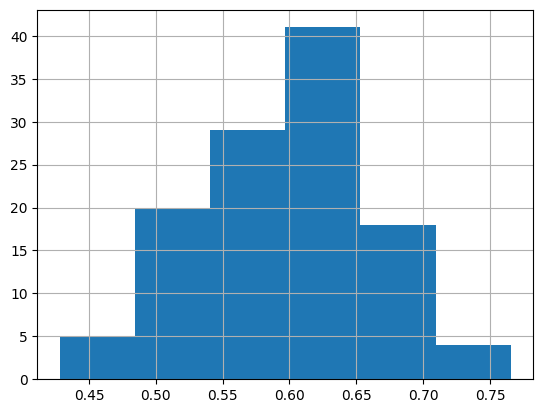

In [295]:
#Draw histogram to see distribution
df['Semantic-Score'].hist(bins=6)

We can see that it follows normal distribution

In [285]:
df['Score-Bin'] = pd.cut(df['Semantic-Score'], bins=6)
# Sample from each bin
n = 0.3
sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
sample_df = sample_df.reset_index(drop=True)
sample_df['Label'] = ''



/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2376815570.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2376815570.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))


In [286]:
sample_df.shape

(33, 8)

Iterate, and give labels 'L', 'M' or 'H' before continuing 

In [ ]:
sample_df[sample_df['Label'] == ''][['Semantic-Score','Original-Comment', 'Agent-Comment', 'Label']]

,Semantic-Score,Original-Comment,Agent-Comment,Label
0,0.434890,"""""""The Jinja environment used to load template...","""""""\nReturns an instance of Jinja2's Environme...",
1,0.512154,"""""""Reload templates when they are changed. Use...","""""""\nReturns the value of `TEMPLATES_AUTO_RELO...",
2,0.579308,"""""""Determine if the given string is an IP addr...","""""""\nChecks if the provided string is a valid ...",
3,0.599835,"""""""Enable this to use the ``X-Sendfile`` featu...","""""""\nDeprecation Notice:\n\nThe `use_x_sendfil...",
4,0.612413,"""""""Dispatches the request and on top of that p...","""""""\nDispatches the full request, including ru...",
5,0.606191,"""""""This attribute is set to ``True`` if the ap...","""""""\nDeprecation Notice: `got_first_request` i...",
6,0.646095,"""""""The JSON encoder class to use. Defaults to\...","""""""\nDeprecation Warning: `json_encoder` is de...",
7,0.737521,"""""""The name of the cookie set by the session i...","""""""\nReturns the name of the session cookie.\n...",


In [ ]:
n = 1

print("""-- LABEL --""")
print(sample_df.iloc[n]["Label"])
print("""-- Original Comment --""")
print(sample_df.iloc[n]["Original-Comment"])
print("""-- Agent Comment --""")
print(sample_df.iloc[n]["Agent-Comment"])

-- LABEL --
L
-- Original Comment --
"""Reload templates when they are changed. Used by
        :meth:`create_jinja_environment`. It is enabled by default in debug mode.

        .. deprecated:: 2.2
            Will be removed in Flask 2.3. Use ``app.config["TEMPLATES_AUTO_RELOAD"]``
            instead.

        .. versionadded:: 1.0
            This property was added but the underlying config and behavior
            already existed.
        """
-- Agent Comment --
"""
Returns the value of `TEMPLATES_AUTO_RELOAD` from the application configuration.

If `TEMPLATES_AUTO_RELOAD` is set, its value is returned. Otherwise, the value of `debug` is used as a fallback.

Deprecated since Flask 2.3 in favor of using `TEMPLATES_AUTO_RELOAD` in `app.config`.

Args:
    None

Returns:
    bool: The value of `TEMPLATES_AUTO_RELOAD` or `debug` if not set.
"""


In [ ]:
sample_df.iloc[7,7] = "H"

NOW WE HAVE LABELED ALL THE SAMPLE

In [ ]:
summary = sample_df.groupby('Label')['Semantic-Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()
summary

,Label,Mean,Std_Dev,Min,Q1,Median,Q3,Max
0,H,0.671856,0.092864,0.606191,0.639024,0.671856,0.704689,0.737521
1,L,0.515626,0.082527,0.434890,0.473522,0.512154,0.555994,0.599835
2,M,0.612605,0.033394,0.579308,0.595860,0.612413,0.629254,0.646095


In [ ]:
# Get Q3 of L and Q1 of M
l_q3 = summary.loc[summary['Label'] == 'L', 'Q3'].values[0]
m_q1 = summary.loc[summary['Label'] == 'M', 'Q1'].values[0]
threshold_L_M = (l_q3 + m_q1) / 2

# Get Q3 of M and Q1 of H
m_q3 = summary.loc[summary['Label'] == 'M', 'Q3'].values[0]
h_q1 = summary.loc[summary['Label'] == 'H', 'Q1'].values[0]
threshold_M_H = (m_q3 + h_q1) / 2

# Show results
print("Threshold between L and M:", round(threshold_L_M, 3))
print("Threshold between M and H:", round(threshold_M_H, 3))

Threshold between L and M: 0.576
Threshold between M and H: 0.634
